(c) Juan Gomez 2020. Thanks to Universidad EAFIT for support. This material is part of the course Introduction to Finite Element Analysis

# Taller 2: Análisis de tensiones por el método de los elementos finitos para una presa triangular sometida al empuje de un fluido.

### Contenido

* Creación de líneas físicas en la malla de **gmsh** para imponer cargas y condiciones de frontera.

* Conversión de la malla a archivos de texto usando funciones de **SolidsPy**.

* Ejecución del análsis de tensiones usando **SolidsPy**.

* Postprocesado de la solución.

### Problema

Determine la distribución de tensiones en una presa rectangular sometida al empuje de un fluido como la que se muestra en la figura:

<center><img src="img/dam.png" alt="files" style="width:500px"></center>


Compare sus resultados con la solución analitica dada por:

$$\sigma_{yy}= \gamma(H-y)-2\gamma x$$

$$\sigma_{xx}=-\gamma(H-y)$$

$$\tau_{xy}=-\gamma x$$

### Modulos

Para la solución se utilizarán los siguientes modulos:

* Numpy.
* Pre-procesador de SolidsPy.
* Ensamblador de SolidsPy.
* Solucionador de SolidsPy.
* Post-procesadr de SolidsPy.

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import meshio
import solidspy.preprocesor as msh
import solidspy.postprocesor as pos
import solidspy.assemutil as ass
import solidspy.solutil as sol

### Código principal

En el siguinete código:

* Se cargan los archivos de nudos, elementos, cargas y materiales (Para crear estos archivos es necesario convertir el modelo de gmsh en archivos de texto usando la rutina **taller1_fem.py**.

* Se identifcan las condiciones de ensamblaje.

* Se ensamblan la matriz de rigidez y el vector de cargas.

* Se resuelve el sistema de ecuaciones.

* Se post-procesan los resultados.

In [3]:
nodes    = np.loadtxt('files/'+'nodes.txt', ndmin=2)
mats     = np.loadtxt('files/'+'mater.txt', ndmin=2)
elements = np.loadtxt('files/'+'eles.txt', ndmin=2, dtype=np.int)
loads    = np.loadtxt('files/'+'loads.txt', ndmin=2)

In [4]:
DME, IBC, neq = ass.DME(nodes, elements)
mat_rigidez   = ass.assembler(elements, mats, nodes, neq, DME)
force_vec     = ass.loadasem(loads, IBC, neq)
UG            = sol.static_sol(mat_rigidez, force_vec)
UC            = pos.complete_disp(IBC, nodes, UG)

<IPython.core.display.Javascript object>


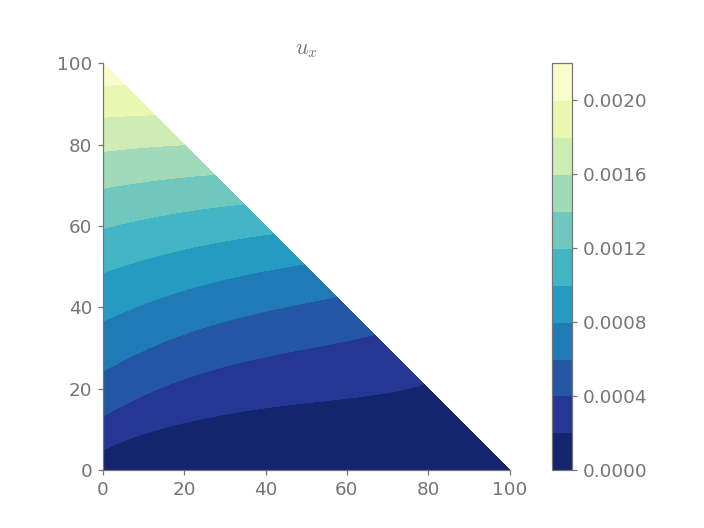

C:\Users\AX201 GMRS\Anaconda3\lib\site-packages\solidspy\postprocesor.py:108: UserWarning: The following kwargs were not used by contour: 'shading'
  disp_plot(tri, field, levels, shading="gouraud")


<IPython.core.display.Javascript object>


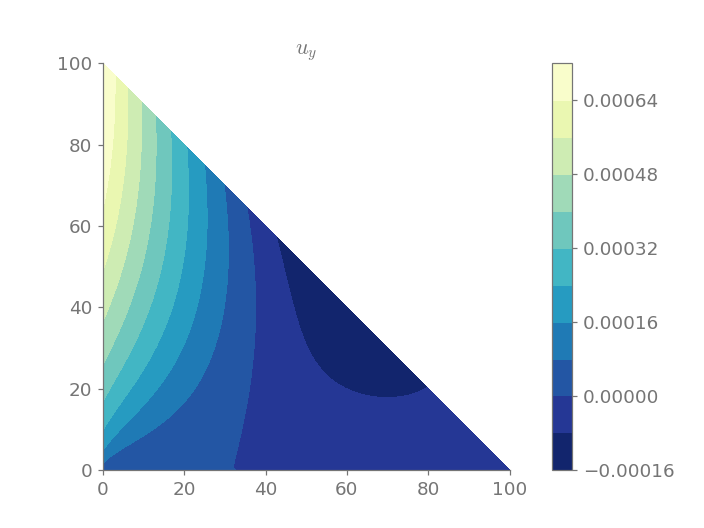

<IPython.core.display.Javascript object>


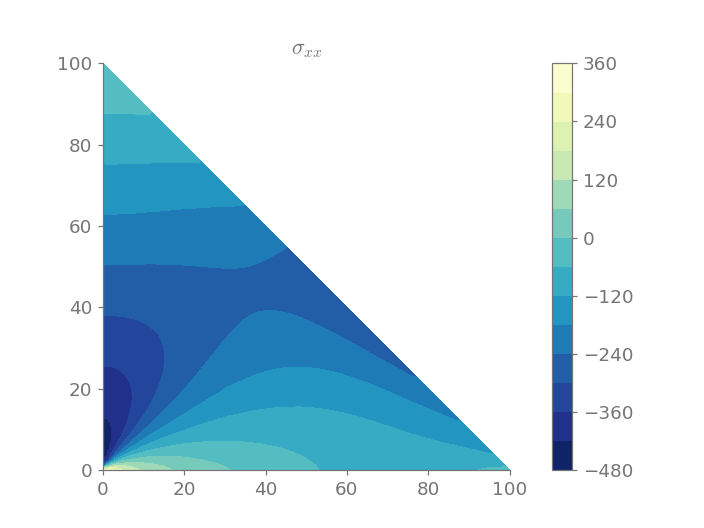

<IPython.core.display.Javascript object>


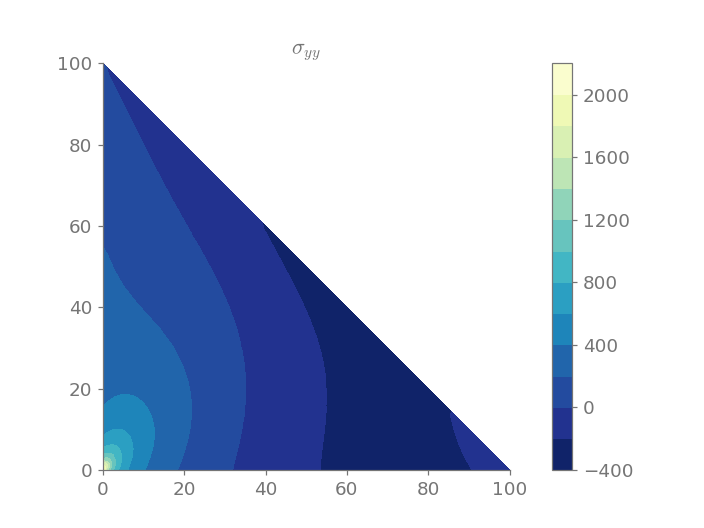

<IPython.core.display.Javascript object>


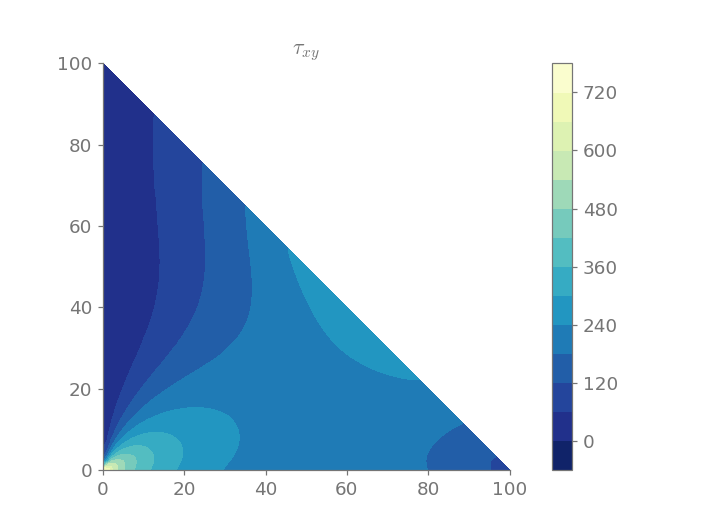

In [5]:
E_nodes, S_nodes = pos.strain_nodes(nodes, elements, mats, UC)
pos.fields_plot(elements, nodes, UC, S_nodes=S_nodes)

### Preguntas propuestas.

- **1)** Usando 3 mallas diferentes (una muy gruesa, una mediana y una muy refinada) comente sobre los resultados visuales para cada una.

- **2)** Que diferencias observa entre la solución analitica y la solución por elementos finitos?

- **3)** Como explica las diferencias entre ambas soluciones?

- **4)** Que mejoras incorporaría al modelo para reducir las diferencias?